Jupyter Notebok tweaks for the presentation export with Reveal.js and when using RISE (RISE is a jupyter notebook extension).

**Important**: this must be as slide type "Notes"

In [1]:
from IPython.display import HTML

def apply_html_tweak(html_script_path):
    with open(html_script_path, encoding='utf-8') as fh:
        display(HTML(fh.read()))

apply_html_tweak("../../reveal_js_tweaks.txt")
#apply_html_tweak("../../rise_tweaks.txt")

<span style="font-size:4em;color:#130754;">Pandas crash course</span>


<img src="./imgs/pandas_crash_course_logo.jpg" alt="Pandas crash course logo" width="500">


<i>By <b>Thibault Bétrémieux</b>, Data Scientist at port-neo Freiburg GmbH (part of port-neo GmbH), thibault.betremieux@port-neo.com</i>

This is a presentation for the Python User Group Freiburg. It took place in two parts. [Meetup Link of part 1](https://www.meetup.com/fr-FR/Python-User-Group-Freiburg/events/275586196/) | [Meetup Link of part 2](https://www.meetup.com/fr-FR/Python-User-Group-Freiburg/events/276350224/).

**[Link to the resources](https://github.com/ThibTrip/thib/tree/master/2021/pandas_crash_course)**

# Table of contents

1. Introduction: explanations on the main structures of the pandas API (Series, DataFrame, indices, data types), resources that can help you

2. I/O: read from/save to csv, Excel, SQL, ... BONUS: SQL records update using DataFrames

3. Selecting rows/columns

4. Basic math operations

5. Some common DataFrame operations e.g. handling duplicates, missing values

6. String operations

7. Time operations

8. Transformations: concatenate, merge, groupby, stack

9. Using custom functions: map, apply, applymap

10. Outside of scope: things you should know about that I won't present in detail
    - pandas' method chaining super power
    - categoricals
    - plotting
    - styling

# 1. Introduction

## 1.1. What is pandas and what can you do with it

> pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
> 
> (Source: [Wikipedia](https://en.wikipedia.org/wiki/Pandas_%28software%29))


pandas was created by Wes McKinney.

Amongst many other things pandas allows you to:

* **read from and save to** many formats (csv, excel, SQL, feather, parquet, ...)
* do fast vectorized operations (e.g. column1 + column2) with lots of already integrated math/stats methods
* transform data by grouping (similar to SQL GROUP BY), pivoting, stacking (columns to rows) and unstacking, ...
* apply your own functions element wise or vector wise
* work with strings and datetimes easely (e.g. `pd.Series.str.strip`, `pd.Series.dt.month`, ...)
* deal with duplicates and null values
* plot
* present tables with pretty styling 🦄

If used correctly (i.e. in a vectorized and optimized manner) it can be very fast. It actually uses `C` extensions which speeds up operations.

## 1.2. What you can't do (or do well) with pandas

### 1.2.1. Working with massive datasets 
You can't transform very big tabular data at once (e.g. a dataset of 100GB) since you'd have to fit it in memory. But there are easy ways to overcome such situations

* work with pandas in chunks (read chunk, process chunk, save chunk)
* pandas + something else. E.g. dump the data in a SQL database and load an aggregated version of it in pandas where you will do additional transformations.
* something else e.g. [ibis](http://ibis-project.org/) which combines Python syntax with SQL. Or simply SQL (I myself use PostgreSQL a lot 🐘)
* using libraries such as [dask](https://docs.dask.org/en/latest/dataframe.html). `dask` is **lazy** and only does the computations on the dataset when needed
* see also [page "Scaling to large datasets" in pandas docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html)


### 1.2.2. Structures with many dimensions

Working with structures with more dimensions that just a plain table with rows and columns will be tough with pandas. E.g. something like an OLAP cube: 

![olap](./imgs/olap_cube.png)

The example above could still work in pandas because you can use multiple levels of columns and indices but it would start to get tricky 🤔. For such structures you can use [xarray](http://xarray.pydata.org/).

## 1.3. Installation

`pip install pandas` or `conda install pandas` (if you use `conda`)

This tutorial uses the most recent version of pandas which is **`1.2.1`** at this time.

## 1.4. Recommandations

When starting/updating a script/module/library I recommand using `pandas` in an interactive environment such as [Jupyter Lab](https://jupyter.org/) where you can **watch and document the transformation of a table** which makes it very easy to troubleshoot problems.
The easiest way to install `Jupyter Lab` is to enter `pip install jupyterlab` but I recommand installing [Anaconda](https://www.anaconda.com/products/individual) which is a bundle containing Python, Jupyter, the conda package and environment manager and lots of other very useful tools for data science.


With my favorite extension for `Jupyter Lab` called [jupytext](https://github.com/mwouts/jupytext) you can even **work with Python text files interactively, as if they were notebooks**. This allows you to develop modules or even libraries which I do myself very often. I talked about it during my last [presentation](https://thibtrip.github.io/lightning_talks/#/5).

## 1.5. Highly recommanded resources

* [The new pandas documentation](https://pandas.pydata.org/docs/getting_started/index.html): I've linked here the **"Getting started"** page which is well illustrated but the whole documentation is really awesome (also the reference for functions/methods etc, despite some abstract examples sometimes)


**WARNING:** in the resources below some things may be outdated and some things can now be done more efficiently or with a shorter code but those are still great resources nonetheless.

* data school ([website](https://www.dataschool.io/easier-data-analysis-with-pandas/) | [YouTube channel](https://www.youtube.com/c/dataschool/featured)): topics on pandas that are very well explained and presented in video
* [Python for Data Analysis Book](https://wesmckinney.com/pages/book.html) **by the author of pandas**: make sure to get the latest edition (2nd at the time I am writing this)! This is not as easy as the data school videos but it's very helpful

Since `pandas` is a very popular library, **most questions** (especially basic ones) are just **one google query away**. And most of the time you will propbably end up on a **stackoverflow** thread 🙈 or the **pandas documentation**.

## 1.6. Structures

### 1.6.1. `pd.Series`

> Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.
>
> (Source: [pandas docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html))

This can be compared to a dictionary. Unlike the dictionary the index allows duplicate by default! A [new experimental feature](https://pandas.pydata.org/docs/whatsnew/v1.2.0.html#optionally-disallow-duplicate-labels) exists to check that automatically on subsequent operations.

#### Creating a Series from scratch

In [2]:
import pandas as pd

s = pd.Series(['Thibault', 'John'])
s

0    Thibault
1        John
dtype: object

In [3]:
s.index

RangeIndex(start=0, stop=2, step=1)

In [4]:
s.values

array(['Thibault', 'John'], dtype=object)

you can provide a name for the Series, a different index than the default one (range from 0 to the length of the DataFrame minus one) and even name the index

In [5]:
s = pd.Series(data=['Thibault', 'John'], index=['a', 'b'], name='firstname')
s.index.name = 'id'
s

id
a    Thibault
b        John
Name: firstname, dtype: object

In [6]:
pd.Series(data={'a':'Thibault', 'b':'John'}, # a dict {index:value} also works
          name='firstname').rename_axis(index='id')

id
a    Thibault
b        John
Name: firstname, dtype: object

In [7]:
s.dtype # 'O' stands for "object", more on that later

dtype('O')

#### Notes on data types

wondering why the data type of our Series is "O" (**"object"**) and not something like **"string"** or "str"? `pandas` uses lots of `numpy` arrays in the backend and `numpy` does not have a string data type for arrays.

By the way `numpy` arrays are similar to python lists but they are typed which allows for much faster vectorized operations (more on that later). And `numpy` uses `C` extensions which is faster than Python.

In [8]:
type(s.values) # yep it's a numpy array

numpy.ndarray

But pandas has developped so called extension arrays (they extend numpy arrays) where a **"string"** data type exists. You can start using them already by using the method `convert_dtypes`

Why it matters:

* the numpy "object" dtype (data type) is not specific to strings so it can contain other things
* pandas' string data type will only allow string or null
* it's clear what it is (string and not something else)

In [9]:
s = s.convert_dtypes()
s

id
a    Thibault
b        John
Name: firstname, dtype: string

In [10]:
s.dtype # StringDtype is an extension array of pandas

StringDtype

### 1.6.2. `pd.DataFrame`

> Data structure also contains labeled axes (rows and columns) [...] Can be thought of as a dict-like container for Series objects. The primary pandas data structure.
>
> (Source: [pd.DataFrame docstring](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html))

#### Creating a DataFrame from scratch

I'll use different ways to create DataFrames later. Pandas can ingest many different things 🐼.

Like `pd.Series` you can put pretty much any type of data you want in a DataFrame (float, int, complex numbers, tuple, list, str, ...).

In [11]:
data = {'first_name':['Alex', 'John'],
        'number_of_cars':[0, 2],
        'is_subscribed_to_newsletter':[False, True],
        'interests':[['pizza', 'traveling'], ['movies']]}
df = pd.DataFrame(data=data)
df

,first_name,number_of_cars,is_subscribed_to_newsletter,interests
0,Alex,0,False,"[pizza, traveling]"
1,John,2,True,[movies]


In [12]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [13]:
df.columns

Index(['first_name', 'number_of_cars', 'is_subscribed_to_newsletter',
       'interests'],
      dtype='object')

## Data types

In [14]:
df.dtypes

first_name                     object
number_of_cars                  int64
is_subscribed_to_newsletter      bool
interests                      object
dtype: object

In [15]:
# I'd suggest using the new data types here as well
df = df.convert_dtypes()
df.dtypes

first_name                      string
number_of_cars                   Int64
is_subscribed_to_newsletter    boolean
interests                       object
dtype: object

#### The columns of the DataFrame are in fact Series 😳

In [16]:
df['first_name'] # selects the column "first_name"

0    Alex
1    John
Name: first_name, dtype: string

In [17]:
type(df['first_name'])

pandas.core.series.Series

### 1.6.3. Notes on indices and labels

* The index of a Series or a DataFrame can have multiple levels
* The columns of a DataFrame can have multiple levels
* A DataFrame can also receive a name for each column level and a name for the index. Yes I know it's confusing 🐒

Some operations may return a Series or DataFrame with multidimensional headers or indices (e.g. pivot, stack) so do not be surprised!
Here is an example which we won't work with because we'd need much more time if we wanted to learn about selecting and operating on DataFrames with multidimensional headers/indices

In [18]:
import numpy as np
index = pd.MultiIndex.from_product([[2020, 2021], ['Freiburg', 'Lindau']], names=['year', 'location'])
columns = pd.MultiIndex.from_product([['Superstore', 'Alnatura'], ['cosmetics', 'food']], names=['store', 'product_type'])
data = np.random.randint(low=10000, high=900000, size=(len(index),len(columns)))
df = pd.DataFrame(data=data, index=index, columns=columns)
# add a label for the whole index (not labels for each level which we have already)
df.index.name = 'my_index'
df

store         Superstore          Alnatura        
product_type   cosmetics    food cosmetics    food
year location                                     
2020 Freiburg     508387  701314    585658  896122
     Lindau       470714  461809    202986  387768
2021 Freiburg      54587  798318    292047  291858
     Lindau       885204   11586    123998  618341

In [19]:
# it's surprising pandas doesn't show the index name but only the names of the levels, but as you can see it's here
print(f'index name: {df.index.name}')
print(f'names of index levels: {df.index.names}')

index name: my_index
names of index levels: ['year', 'location']


The behavior of some operations changes with multidimensional headers and indices.

For instance when using the syntax I mentioned before for selecting a column we get a DataFrame back in the example below (a subset of our DataFrame to be precise) and not a Series

In [20]:
df['Superstore']

product_type   cosmetics    food
year location                   
2020 Freiburg     508387  701314
     Lindau       470714  461809
2021 Freiburg      54587  798318
     Lindau       885204   11586

See also this [example](https://github.com/ThibTrip/thib/blob/master/2021/pandas_crash_course/examples/merge/question_pandas_merge.ipynb) on a question about merge operation Lilia Schuster asked me!

The transformation is a bit complicated but the **multidimensional DataFrame** output at cell **`[5]`** is particularly interesting.

### 1.6.4. ⚠️ The index is a separate entity and cannot be selected like columns!

In [21]:
import traceback

df = pd.DataFrame({'name':['Tibaldo', 'John']}, index=pd.Index([100, 200], name='id'))
display(df) # pretty print function implicitely imported when using Jupyter/IPython (from IPython.display import display)

try:
    df['id']
except KeyError:
    traceback.print_exc()

df.index # <-- select like this (and if you have multiple levels use df.index.get_level_values('id'))

,name
id,
100,Tibaldo
200,John


Traceback (most recent call last):
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 2891, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1675, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1683, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'id'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-21-1789fb35f70c>", line 7, in <module>
    df['id']
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/core/frame.py", line 2902, in __getitem__
    indexer = self.columns.get_loc(key)
  File "/home/tibaldo/anaconda3/envs/lab-

Int64Index([100, 200], dtype='int64', name='id')

# 2. I/O (Input/Output)

**WARNING**: with csv and excel files (and any kind of file that does not contain data type indications actually) pandas infers data types. Values such as `01234` will be interpreted as `1234`. If it was a zip code it is now wrong.

Use the parameter **`dtype`** to circumvent this as I'll show in the examples or use the [gist](https://gist.github.com/ThibTrip/55fce86de023c98b9379de2f9be58249) I made for that which will infer which columns should be kept as string by using some custom rules.

In [22]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///./data/db.sqlite3')

# prepare some data to read
# note: for once I don't use UTC because we cannot include timezone info in Excel...
data = [['Alex', pd.Timestamp('2020-01-01 10:01:02'), 0, False, '01234', '+999'],
        ['John', pd.Timestamp('2020-01-01 20:07:10'), 2, True, '12345', '+222']]
columns = ['first_name', 'last_website_visit', 'number_of_cars', 'is_subscribed_to_newsletter',
           'zip_code', 'phone_number']
df = pd.DataFrame(data=data, columns=columns, index=pd.Index((100, 200), name='id'))

df.to_csv('./data/example.csv', sep=';') # ";" is common in Germany so people ought to now about it
df.to_excel('./data/example.xlsx', sheet_name='example')
df.to_pickle('./data/df.pickle')
df.to_sql(name='people', con=engine, if_exists='replace', method='multi')

## 2.1. CSV files


Explanations on some parameters you'll probably use at some point:

* `sep`: delimiter, by default `","` but in Germany it is often `";"`
* `encoding`: in Germany it is sometimes "iso-8859-1" (encoding can be detected with [chardet](https://github.com/chardet/chardet) if needed)
* **`dtype`**: which data type pandas should use for columns e.g. `string` (all the columns as the String data type) or `{'zip_code':'string'}` (the column "zip_code" as the String data type, for the rest we let pandas infer it)
* `index_col`: which column(s) to use as index
* `usecols` for selecting only some columns
* `chunksize`: yields n rows at a time (gives back an iterator), this is great for working on huge files in chunks
* `skiprows`: list-like of line numbers or number of lines to skip (or callable)

Obviously there are many more parameters e.g. I remember tweaking `na_values` and `keep_default_na` for working with geographic data to avoid `NA` (Namibia) being interpreted as a NULL value 🙈.

In [23]:
# read from csv
df = pd.read_csv('./data/example.csv', sep=';', dtype={'zip_code':'string', 'phone_number':'string'}, index_col='id')

# save to csv (let's assume you'll want ';' as a separator as well here)
df.to_csv('./data/example.csv', sep=';')

df

,first_name,last_website_visit,number_of_cars,is_subscribed_to_newsletter,zip_code,phone_number
id,,,,,,
100,Alex,2020-01-01 10:01:02,0,False,01234,+999
200,John,2020-01-01 20:07:10,2,True,12345,+222


you can read directly from a URL too (ftp, s3 and more URL schemes are also supported). Most read and save methods also handle **compression**. Note that reading from archives only works if there is only one file in the archive (but it's easy to [use a file handle to select files](https://stackoverflow.com/a/44118138))

In [24]:
df = pd.read_csv('http://download.geonames.org/export/dump/cities15000.zip',
                 header=None, # the first row is not a header, I'll provide my own names (see below)
                 names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class',
                        'feature code', 'country code', 'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code',
                        'population', 'elevation', 'dem', 'timezone', 'modification date'],
                 sep='\t') # tabulation

df = df.convert_dtypes().set_index('geonameid')
df

,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
geonameid,,,,,,,,,,,,,,,,,,
3040051,les Escaldes,les Escaldes,"Ehskal'des-Ehndzhordani,Escaldes,Escaldes-Engo...",42.50729,1.53414,P,PPLA,AD,<NA>,08,<NA>,<NA>,<NA>,15853,<NA>,1033,Europe/Andorra,2008-10-15
3041563,Andorra la Vella,Andorra la Vella,"ALV,Ando-la-Vyey,Andora,Andora la Vela,Andora ...",42.50779,1.52109,P,PPLC,AD,<NA>,07,<NA>,<NA>,<NA>,20430,<NA>,1037,Europe/Andorra,2020-03-03
290594,Umm Al Quwain City,Umm Al Quwain City,"Oumm al Qaiwain,Oumm al Qaïwaïn,Um al Kawain,U...",25.56473,55.55517,P,PPLA,AE,<NA>,07,<NA>,<NA>,<NA>,62747,<NA>,2,Asia/Dubai,2019-10-24
291074,Ras Al Khaimah City,Ras Al Khaimah City,"Julfa,Khaimah,RAK City,RKT,Ra's al Khaymah,Ra'...",25.78953,55.94320,P,PPLA,AE,<NA>,05,<NA>,<NA>,<NA>,351943,<NA>,2,Asia/Dubai,2019-09-09
291580,Zayed City,Zayed City,"Bid' Zayed,Bid’ Zayed,Madinat Za'id,Madinat Za...",23.65416,53.70522,P,PPL,AE,<NA>,01,103,<NA>,<NA>,63482,<NA>,124,Asia/Dubai,2019-10-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894701,Bulawayo,Bulawayo,"BUQ,Bulavajas,Bulavajo,Bulavejo,Bulawayo,bu la...",-20.15000,28.58333,P,PPLA,ZW,<NA>,09,<NA>,<NA>,<NA>,699385,<NA>,1348,Africa/Harare,2019-09-05
895061,Bindura,Bindura,"Bindura,Bindura Town,Kimberley Reefs,Биндура",-17.30192,31.33056,P,PPLA,ZW,<NA>,03,<NA>,<NA>,<NA>,37423,<NA>,1118,Africa/Harare,2010-08-03
895269,Beitbridge,Beitbridge,"Bajtbridz,Bajtbridzh,Beitbridge,Beitbridzas,Be...",-22.21667,30.00000,P,PPL,ZW,<NA>,07,<NA>,<NA>,<NA>,26459,<NA>,461,Africa/Harare,2013-03-12


## 2.2. Excel files

Apart from `sep` and `encoding` this method also has the parameters I mentioned above.

A very important argument here is `sheet_name` to select which sheet of the excel file you want to read.

You'll have to install `openpyxl` for reading and writing Excel files (`pip install openpyxl`). Openpyxl is pretty cool. I've used it a few times to list sheet names, check out which sheet are hidden, how cells are formatted etc. Here is for instance an [Openpyxl tutorial](https://zetcode.com/python/openpyxl/) showing some of the possibilities.

If working with `.xls` files (as opposed to `.xlsx`) you'll have to use `xlrd` (`pip install xlrd`).

In [25]:
df = pd.read_excel('./data/example.xlsx', dtype={'zip_code':'string', 'phone_number':'string'}, index_col='id',
                   sheet_name='example') # if not provided, the first sheet is read

# save to excel
df.to_excel('./data/example.xlsx', sheet_name='example') # default sheet name is "Sheet1"

df

,first_name,last_website_visit,number_of_cars,is_subscribed_to_newsletter,zip_code,phone_number
id,,,,,,
100,Alex,2020-01-01 10:01:02,0,False,01234,+999
200,John,2020-01-01 20:07:10,2,True,12345,+222


## 2.3. SQL

We use the library `sqlalchemy` for creating an object to communicate with the database (see `engine` below).

The `sqlalchemy.create_engine` function we use below takes a [connection string to a database](https://docs.sqlalchemy.org/en/latest/core/engines.html).

For example, the syntax for PostgreSQL (it's similar for most other databases) is as follows:

```python
connection_string = f'postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DB}'
```

In [26]:
from sqlalchemy import create_engine # pip install sqlalchemy

# sqlite is a bit of special SQL flavor since the database is on the disk (so you just provide a path)
connection_string = 'sqlite:///./data/db.sqlite3'
engine = create_engine(connection_string)

df = pd.read_sql(sql='SELECT * FROM people;', con=engine, index_col='id')
df

,first_name,last_website_visit,number_of_cars,is_subscribed_to_newsletter,zip_code,phone_number
id,,,,,,
100,Alex,2020-01-01 10:01:02.000000,0,0,01234,+999
200,John,2020-01-01 20:07:10.000000,2,1,12345,+222


Saving to SQL

In [27]:
df.to_sql(name='people',
          con=engine,
          index=True, # default, we want to save the index 
          if_exists='replace', # what to do if the table exists (default is "fail" which raises an Exception) and there is also "append"
          method='multi') # IMPORTANT!!!! Otherwise inserts row by row which is super slow

**Important tip**: I made a [benchmark of df.to_sql](https://gist.github.com/ThibTrip/b0a752c7b7b1756d87832a5bb48a165b) for PostgreSQL with many methods and as you'll see there are huge differences: from 2min 48 for the slowest method down to **16.1s** for the fastest method!

### Bonus: updating rows in a SQL table with a DataFrame thanks to my library [pangres](https://github.com/ThibTrip/pangres)

You will need a **primary key** (or a unique key) which is one or multiple columns for identifying records. The primary key will have to be set as index in the pandas DataFrame.

The example in the next slides demonstrates what the library can do, but you'll definitely need the [documentation](https://github.com/ThibTrip/pangres/wiki).

load some table I saved in the database

In [28]:
from sqlalchemy import create_engine # pip install sqlalchemy
engine = create_engine('sqlite:///./data/db.sqlite3')
engine.execute('DROP TABLE IF EXISTS pangres_test;')
engine.execute("""CREATE TABLE pangres_test (
                      id int PRIMARY KEY,
                      first_name text,
                      number_of_cars int);""")
engine.execute("""INSERT INTO pangres_test (id, first_name, number_of_cars)
                  VALUES (100, "John", 2), (200, "Thibault", 1);""")

In [29]:
from sqlalchemy import create_engine # pip install sqlalchemy
from pangres import upsert # pip install pangres
engine = create_engine('sqlite:///./data/db.sqlite3') # "./data/db.sqlite3" is the path to a SQlite3 database
df = pd.read_sql('SELECT * FROM pangres_test;', con=engine, index_col='id').convert_dtypes()
df

,first_name,number_of_cars
id,,
100,John,2
200,Thibault,1


create some new data to update and insert

In [30]:
new_df = pd.DataFrame({'id':[200, 300], 'first_name':['Lord Thibault', 'Alex'], 'number_of_cars':[30, 1], 'number_of_houses':[5, 2]}).set_index('id')
new_df

,first_name,number_of_cars,number_of_houses
id,,,
200,Lord Thibault,30,5
300,Alex,1,2


upsert (insert update) the new data and check what is in the table

In [31]:
upsert(engine=engine, df=new_df, table_name='pangres_test', if_row_exists='update', add_new_columns=True, chunksize=100)
pd.read_sql('SELECT * FROM pangres_test;', con=engine, index_col='id').convert_dtypes()

2021-02-27 20:55:53,669 | INFO     | pangres    | logger:log:48 - Added column pangres_test.number_of_houses (type: BIGINT) in table pangres_test (schema="None")


,first_name,number_of_cars,number_of_houses
id,,,
100,John,2,<NA>
200,Lord Thibault,30,5
300,Alex,1,2


## 2.4. Pickles

While you can use `joblib` to store a Python session on disk, I find pickles really interesting for simply exchanging a few DataFrames (amongst other things) between notebooks.

For pickling other things than DataFrames see [this stackoverflow post](https://stackoverflow.com/a/11218504).

![pickles](./imgs/pickle.png)

In [32]:
df = pd.read_pickle('./data/df.pickle') # note: this will work on any kind of pickled object if you are lazy 🐒 (so not just DataFrames)
df.to_pickle('./data/df.pickle')
df

,first_name,last_website_visit,number_of_cars,is_subscribed_to_newsletter,zip_code,phone_number
id,,,,,,
100,Alex,2020-01-01 10:01:02,0,False,01234,+999
200,John,2020-01-01 20:07:10,2,True,12345,+222


## 2.5. HTML

`pd.read_html` always returns a list of DataFrames: one DataFrame for each table that can be found on given website or HTML code

Example: grab the german region codes (ISO 3166-2) from Wikipedia

In [33]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-2:DE')
dfs[0].set_index('Code')

,Subdivision Name (de),Subdivision Name (en)[note 1]
Code,,
DE-BW,Baden-Württemberg,Baden-Württemberg
DE-BY,Bayern,Bavaria
DE-BE,Berlin,Berlin
DE-BB,Brandenburg,Brandenburg
DE-HB,Bremen,Bremen
DE-HH,Hamburg,Hamburg
DE-HE,Hessen,Hesse
DE-MV,Mecklenburg-Vorpommern,Mecklenburg-Western Pomerania
DE-NI,Niedersachsen,Lower Saxony


## 2.6. Many more file types are handled by pandas

JSON, stata, parquet, feather, HD5F... See [I/O page](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) of the documentation.

## 2.7. Pro tip: `pd.json_normalize`

The function `pd.json_normalize` allows you to quickly parse data from APIs that use JSON

In [34]:
import requests, json
# get facts on cats from a free public API
response = requests.get('https://cat-fact.herokuapp.com/facts')
json_data = response.text
json_data[0:500] + '...' # let's just display a part of the JSON string

'[{"status":{"verified":true,"sentCount":1},"type":"cat","deleted":false,"_id":"58e008800aac31001185ed07","user":"58e007480aac31001185ecef","text":"Wikipedia has a recording of a cat meowing, because why not?","__v":0,"source":"user","updatedAt":"2020-08-23T20:20:01.611Z","createdAt":"2018-03-06T21:20:03.505Z","used":false},{"status":{"verified":true,"sentCount":1},"type":"cat","deleted":false,"_id":"58e008630aac31001185ed01","user":"58e007480aac31001185ecef","text":"When cats grimace, they are u...'

In [35]:
json_data_loaded = json.loads(json_data)
json_data_loaded[0]

{'status': {'verified': True, 'sentCount': 1},
 'type': 'cat',
 'deleted': False,
 '_id': '58e008800aac31001185ed07',
 'user': '58e007480aac31001185ecef',
 'text': 'Wikipedia has a recording of a cat meowing, because why not?',
 '__v': 0,
 'source': 'user',
 'updatedAt': '2020-08-23T20:20:01.611Z',
 'createdAt': '2018-03-06T21:20:03.505Z',
 'used': False}

Use `pd.json_normalize` on the data we just acquired and loaded as JSON

There are very useful arguments in this function e.g. `record_path` to precise which json key holds the records.

Notice the two coluns `status.verified` and `status.sentCount` which came from a structure like this:

```python
{'status': {'verified': True, 'sentCount': 1}}
```
 
The `.` shows the different nodes (you can modify the symbol with the argument `sep`).

In [36]:
df = pd.json_normalize(json_data_loaded) # 
df.head(2) # display the first 2 rows (by default it is 5)

,type,deleted,_id,user,text,__v,source,updatedAt,createdAt,used,status.verified,status.sentCount
0,cat,False,58e008800aac31001185ed07,58e007480aac31001185ecef,"Wikipedia has a recording of a cat meowing, be...",0,user,2020-08-23T20:20:01.611Z,2018-03-06T21:20:03.505Z,False,True,1
1,cat,False,58e008630aac31001185ed01,58e007480aac31001185ecef,"When cats grimace, they are usually ""taste-sce...",0,user,2020-08-23T20:20:01.611Z,2018-02-07T21:20:02.903Z,False,True,1


Note: this is not the best example since we can also do it in one line 🙈. Well to be fair the **status** column is not split in 2 unlike previously! But you get the idea...

In [37]:
df = pd.read_json('https://cat-fact.herokuapp.com/facts')
df.head()

,status,type,deleted,_id,user,text,__v,source,updatedAt,createdAt,used
0,"{'verified': True, 'sentCount': 1}",cat,False,58e008800aac31001185ed07,58e007480aac31001185ecef,"Wikipedia has a recording of a cat meowing, be...",0,user,2020-08-23T20:20:01.611Z,2018-03-06T21:20:03.505Z,False
1,"{'verified': True, 'sentCount': 1}",cat,False,58e008630aac31001185ed01,58e007480aac31001185ecef,"When cats grimace, they are usually ""taste-sce...",0,user,2020-08-23T20:20:01.611Z,2018-02-07T21:20:02.903Z,False
2,"{'verified': True, 'sentCount': 1}",cat,False,58e00a090aac31001185ed16,58e007480aac31001185ecef,Cats make more than 100 different sounds where...,0,user,2020-08-23T20:20:01.611Z,2018-02-11T21:20:03.745Z,False
3,"{'verified': True, 'sentCount': 1}",cat,False,58e009390aac31001185ed10,58e007480aac31001185ecef,"Most cats are lactose intolerant, and milk can...",0,user,2020-08-23T20:20:01.611Z,2018-03-04T21:20:02.979Z,False
4,"{'verified': True, 'sentCount': 1}",cat,False,58e008780aac31001185ed05,58e007480aac31001185ecef,Owning a cat can reduce the risk of stroke and...,0,user,2020-08-23T20:20:01.611Z,2018-03-29T20:20:03.844Z,False


# 3. Selecting rows/columns

## Let's make a DataFrame example

Yes the index is not alphabetically sorted, this is on purpose 🐒

In [38]:
records = [['Alex', 0, False, 1],
           ['John', 2, True, 1],
           ['Thib', 0, True, 2],
           ['Arnold', 2, True, 1]]
columns = ['first_name', 'number_of_cars', 'is_subscribed_to_newsletter', 'number_of_houses']
index = pd.Index(data=(400, 265, 450, 122), name='id')

df = pd.DataFrame(data=records, columns=columns, index=index)
df

,first_name,number_of_cars,is_subscribed_to_newsletter,number_of_houses
id,,,,
400,Alex,0,False,1
265,John,2,True,1
450,Thib,0,True,2
122,Arnold,2,True,1


## 3.1. `df.head()` and `df.tail()`

head displays the first n rows of a DataFrame (by default 5)

In [39]:
df.head(2)

,first_name,number_of_cars,is_subscribed_to_newsletter,number_of_houses
id,,,,
400,Alex,0,False,1
265,John,2,True,1


tail displays the last n rows of a DataFrame (by default 5)

In [40]:
df.tail(2)

,first_name,number_of_cars,is_subscribed_to_newsletter,number_of_houses
id,,,,
450,Thib,0,True,2
122,Arnold,2,True,1


## 3.2. simple column selection

In [41]:
df['first_name'] # I selected one label via a string -> returns a Series


id
400      Alex
265      John
450      Thib
122    Arnold
Name: first_name, dtype: object

In [42]:
df[['first_name', 'number_of_cars']] # mutiple columns -> returns a DataFrame


,first_name,number_of_cars
id,,
400,Alex,0
265,John,2
450,Thib,0
122,Arnold,2


In [43]:
df[['first_name']] # I selected one label but via a list -> also returns a DataFrame


,first_name
id,
400,Alex
265,John
450,Thib
122,Arnold


## 3.3. selection by labels (`df.loc`)

This works by using `df.loc`. The basic syntax is `df.loc[rows (indices), columns]`

In [44]:
indices = [400, 265]
columns = ['first_name', 'number_of_cars']
df.loc[indices, columns]

,first_name,number_of_cars
id,,
400,Alex,0
265,John,2


slices are also allowed (they are somewhat similar to slices with lists)

In [45]:
df.loc[:, ['first_name', 'number_of_cars']] # all rows and the columns "first_name" and "number_of_cars"

,first_name,number_of_cars
id,,
400,Alex,0
265,John,2
450,Thib,0
122,Arnold,2


In [46]:
df.loc[400:450, :] # rows from label 400 to label 450

,first_name,number_of_cars,is_subscribed_to_newsletter,number_of_houses
id,,,,
400,Alex,0,False,1
265,John,2,True,1
450,Thib,0,True,2


In [47]:
df.loc[:, 'first_name':'is_subscribed_to_newsletter'] # columns from label "first_name" until label "is_subscribed_to_newsletter"

,first_name,number_of_cars,is_subscribed_to_newsletter
id,,,
400,Alex,0,False
265,John,2,True
450,Thib,0,True
122,Arnold,2,True



⚠️ if you select a single row label or a single column label a Series is returned

In [48]:
df.loc[400, :]

first_name                      Alex
number_of_cars                     0
is_subscribed_to_newsletter    False
number_of_houses                   1
Name: 400, dtype: object

In [49]:
df.loc[[400], :] # see how this returns a DataFrame even with a single row label just because I put a list

,first_name,number_of_cars,is_subscribed_to_newsletter,number_of_houses
id,,,,
400,Alex,0,False,1


In [50]:
df.loc[:, 'first_name'] # same as df['first_name']

id
400      Alex
265      John
450      Thib
122    Arnold
Name: first_name, dtype: object

🐍 and if you select a single row label AND a single column label you get the value of the cell back.

Here we are effectively selecting a cell and getting the first name of the person with the id 400 (a string)

In [51]:
df.loc[400, 'first_name']

'Alex'

## 3.4. selection by position (`df.iloc`)

In [52]:
index_positions = [0, 2]
columns_positions = [0, 1]
df.iloc[index_positions, columns_positions]

,first_name,number_of_cars
id,,
400,Alex,0
450,Thib,0


you can also use slices here


⚠️ similarly to the standard `range` function `0:2` means only first and second row (not the third one)!

In [53]:
list(range(0, 3)) # this is in case you forgot how range works 🙈

[0, 1, 2]

In [54]:
df.iloc[0:3, :] # rows 0 to 2 included, all columns

,first_name,number_of_cars,is_subscribed_to_newsletter,number_of_houses
id,,,,
400,Alex,0,False,1
265,John,2,True,1
450,Thib,0,True,2


In [55]:
df.iloc[:, 0:3] # all rows, columns 0 to 2 included

,first_name,number_of_cars,is_subscribed_to_newsletter
id,,,
400,Alex,0,False
265,John,2,True
450,Thib,0,True
122,Arnold,2,True


## 3.5. selection by masks (`df.loc`)


⚠️ Use `&` and not `and`!

⚠️ Use `|` and not `or`!

⚠️ Parentheses are important! We are doing comparisons array wise so make sure it is "understandable by Python". There is a WikiPedia article I saw a long time about this logic but I couldn't find it again sorry.

**Bad example**

```python
df['money'] > 10000000 or df['first_name'] == 'Thibault'
```

**Good example**

```python
(df['money'] > 10000000) & (df['first_name'] == 'Thibault')
```


We'll talk about this weird syntax immediately after but mind the rules above!

tell me for each index value if the number of cars is strictly higher than 0 (i.e. the person has a car)

In [56]:
has_cars = df['number_of_cars'] > 0
has_cars

id
400    False
265     True
450    False
122     True
Name: number_of_cars, dtype: bool

tell me for each index value if is_subscribed_to_newsletter is True

In [57]:
is_subscribed = df['is_subscribed_to_newsletter'] == True
is_subscribed

id
400    False
265     True
450     True
122     True
Name: is_subscribed_to_newsletter, dtype: bool

combine the two conditions in a single series

In [58]:
# combine the two conditions in a single series
# "&" NOT "and" (vector comparison, not element comparison)! Also, no need for parentheses here thanks to the use of variables.
has_cars_and_is_subscribed = has_cars & is_subscribed
has_cars_and_is_subscribed

id
400    False
265     True
450    False
122     True
dtype: bool

same thing as before in one statement

In [59]:
# == True is superfluous for column "is_subscribed_to_newsletter"
# as the label clearly indicates, it's boolean  
has_cars_and_is_subscribed = (df['number_of_cars'] > 0) & (df['is_subscribed_to_newsletter']) 
has_cars_and_is_subscribed

id
400    False
265     True
450    False
122     True
dtype: bool

get me the rows where the condition is True

In [60]:
df.loc[has_cars_and_is_subscribed, :] 

,first_name,number_of_cars,is_subscribed_to_newsletter,number_of_houses
id,,,,
265,John,2,True,1
122,Arnold,2,True,1


you can also use masks on columns but this is the kind of thing I rarely use ¯\\\_(ツ)\_/¯

In [61]:
columns_mask = df.columns.str.contains('name') # we will see this "str.contains" "thing" later
print(df.columns.tolist())
print(columns_mask)
df.loc[:, columns_mask]

['first_name', 'number_of_cars', 'is_subscribed_to_newsletter', 'number_of_houses']
[ True False False False]


,first_name
id,
400,Alex
265,John
450,Thib
122,Arnold


# 4. Basic math operations

Let's create some DataFrame. Don't mind the cryptic code to create a random (but realistic) DataFrame of newsletter data it's not very important 🙈

In [62]:
import random, uuid, math

size = 10
index = np.random.choice(['Travel', 'Hotel', 'Restaurant', 'Cinema', 'Theater', 'Cruise'], size=size)
index = pd.Index([f'{cat} Newsletter 2021 #{str(uuid.uuid4()).upper()[:8]}' for cat in index], name='newsletter')
df = pd.DataFrame(index=index)
df['recipients'] = np.random.randint(low=0, high=1500, size=size)
df['impressions'] = df['recipients'].map(lambda v: v//random.uniform(2, 4))
df['clicks'] = df['impressions'].map(lambda v: v//random.uniform(2, 4))
df['soft_bounces'] = df['recipients'].map(lambda v: v//random.uniform(20, 50))
df['hard_bounces'] = df['recipients'].map(lambda v: v//random.uniform(30, 60))
df['unsubscribes'] = df['recipients'].map(lambda v: v//random.uniform(40, 70))
df['author'] = np.random.choice(['John', 'Daniel Z.', 'Alex'], size=size)
# turns out there is a bug with argmax with the new dtype "Int64" that we'll see later
# so let's the old "int" instead 
df = df.astype({c:int for c in df.columns if c != 'author'})
df.head()

,recipients,impressions,clicks,soft_bounces,hard_bounces,unsubscribes,author
newsletter,,,,,,,
Theater Newsletter 2021 #43B886FC,706,183,48,18,12,11,Daniel Z.
Restaurant Newsletter 2021 #659B7392,823,337,98,16,19,15,Alex
Cruise Newsletter 2021 #8CA58215,495,146,43,10,10,7,John
Cinema Newsletter 2021 #31FFCA22,954,264,125,43,26,17,Daniel Z.
Cinema Newsletter 2021 #11982EFE,594,200,84,26,10,11,Daniel Z.


## 4.1. Vector to vector operations

dividing

In [63]:
# this creates a new column "clickrate" equals to clicks/recipients
df['clickrate'] = df['clicks'] / df['recipients']
df.head()

,recipients,impressions,clicks,soft_bounces,hard_bounces,unsubscribes,author,clickrate
newsletter,,,,,,,,
Theater Newsletter 2021 #43B886FC,706,183,48,18,12,11,Daniel Z.,0.067989
Restaurant Newsletter 2021 #659B7392,823,337,98,16,19,15,Alex,0.119077
Cruise Newsletter 2021 #8CA58215,495,146,43,10,10,7,John,0.086869
Cinema Newsletter 2021 #31FFCA22,954,264,125,43,26,17,Daniel Z.,0.131027
Cinema Newsletter 2021 #11982EFE,594,200,84,26,10,11,Daniel Z.,0.141414


addition

In [64]:
# addressees are all the people the newsletter was addressed to, no matter if delivery succeeded
df['addressees'] = df['recipients'] + df['soft_bounces'] + df['hard_bounces']
df.head()

,recipients,impressions,clicks,soft_bounces,hard_bounces,unsubscribes,author,clickrate,addressees
newsletter,,,,,,,,,
Theater Newsletter 2021 #43B886FC,706,183,48,18,12,11,Daniel Z.,0.067989,736
Restaurant Newsletter 2021 #659B7392,823,337,98,16,19,15,Alex,0.119077,858
Cruise Newsletter 2021 #8CA58215,495,146,43,10,10,7,John,0.086869,515
Cinema Newsletter 2021 #31FFCA22,954,264,125,43,26,17,Daniel Z.,0.131027,1023
Cinema Newsletter 2021 #11982EFE,594,200,84,26,10,11,Daniel Z.,0.141414,630


you can also use multiplication, substraction, modulo, remainder etc. but I think you got the point

## 4.2. Vector and scalar (single value)

multiply clicks by 1.5 to boost our values 🐒

In [65]:
df['clicks'] * 1.5

newsletter
Theater Newsletter 2021 #43B886FC        72.0
Restaurant Newsletter 2021 #659B7392    147.0
Cruise Newsletter 2021 #8CA58215         64.5
Cinema Newsletter 2021 #31FFCA22        187.5
Cinema Newsletter 2021 #11982EFE        126.0
Theater Newsletter 2021 #30E92F40       117.0
Restaurant Newsletter 2021 #D63A325E    115.5
Hotel Newsletter 2021 #BA976CA3         150.0
Cinema Newsletter 2021 #3FFF7AF1        114.0
Hotel Newsletter 2021 #0F443622         129.0
Name: clicks, dtype: float64

while we're at boost the recipients AND the impressions too 🐒 (everything is multiplied by 1.5)

In [66]:
df[['recipients', 'impressions']] * 1.5

,recipients,impressions
newsletter,,
Theater Newsletter 2021 #43B886FC,1059.0,274.5
Restaurant Newsletter 2021 #659B7392,1234.5,505.5
Cruise Newsletter 2021 #8CA58215,742.5,219.0
Cinema Newsletter 2021 #31FFCA22,1431.0,396.0
Cinema Newsletter 2021 #11982EFE,891.0,300.0
Theater Newsletter 2021 #30E92F40,603.0,238.5
Restaurant Newsletter 2021 #D63A325E,1152.0,331.5
Hotel Newsletter 2021 #BA976CA3,1263.0,426.0
Cinema Newsletter 2021 #3FFF7AF1,1084.5,334.5


## 4.3. Calculating sum, average, min, etc.

sum of the values of all rows for given column

In [67]:
df['clicks'].sum()

815

simple conditional sum

In [68]:
df.loc[df['author'] == 'John', 'clicks'].sum() # sum of clicks for all newsletter authored by John

229

average of clicks across all newsletter

In [69]:
df['clicks'].mean()

81.5

min clicks (so the worst value)

In [70]:
df['clicks'].min()

43

max clicks (so the best value)

In [71]:
df['clicks'].max()

125

show me the best newsletter in term of clicks

In [72]:
best_newsletter_clicks_index = df['clicks'].argmax()
print(f'index of the best newsletter by position: {best_newsletter_clicks_index}')

# I select best_newsletter_clicks_index in a list to get a DataFrame back (it looks prettier)
df.iloc[[best_newsletter_clicks_index],:]

index of the best newsletter by position: 3


,recipients,impressions,clicks,soft_bounces,hard_bounces,unsubscribes,author,clickrate,addressees
newsletter,,,,,,,,,
Cinema Newsletter 2021 #31FFCA22,954,264,125,43,26,17,Daniel Z.,0.131027,1023


an alternative way of calculating addressees like we did before with:

```python
df['recipients'] + df['soft_bounces'] + df['hard_bounces']
```

In [73]:
df[['recipients', 'soft_bounces', 'hard_bounces']].sum(axis='columns')

newsletter
Theater Newsletter 2021 #43B886FC        736
Restaurant Newsletter 2021 #659B7392     858
Cruise Newsletter 2021 #8CA58215         515
Cinema Newsletter 2021 #31FFCA22        1023
Cinema Newsletter 2021 #11982EFE         630
Theater Newsletter 2021 #30E92F40        426
Restaurant Newsletter 2021 #D63A325E     804
Hotel Newsletter 2021 #BA976CA3          872
Cinema Newsletter 2021 #3FFF7AF1         762
Hotel Newsletter 2021 #0F443622         1248
dtype: int64

# 5. Some common DataFrame operations

## 5.1. Important note on assignment

Apart from a few exceptions such as `df.insert` (inserts a new column at a specific position) **most operations in `pandas` require assignment** or the use of the argument **`inplace`** for operations to happen. We will see examples later.

Indeed, most of the times only copies are returned. This is very interesting for:

* vizualizing transformations before executing them
* doing method chaining

## 5.2. Handling duplicates

Let's create a DataFrame with duplicates in a column that we'd want to get rid of

In [74]:
import pandas as pd

data = {'first_name':['Tibaldo', 'Tibaldo', 'John'],
        'mothertongue':['French', None, 'English']}
df = pd.DataFrame(data=data)
df

,first_name,mothertongue
0,Tibaldo,French
1,Tibaldo,None
2,John,English


### Identifying duplicates

In [75]:
display(df['first_name'])
df['first_name'].duplicated(keep=False) # this marks all duplicate items as True (not just the firsts or lasts occurences)

0    Tibaldo
1    Tibaldo
2       John
Name: first_name, dtype: object

0     True
1     True
2    False
Name: first_name, dtype: bool

### Dropping duplicates

as I wrote with the note on the assignment before, here I am just showing what would be the result of the operation (I get a transformed copy of the DataFrame)

In [76]:
df.drop_duplicates(subset=['first_name'], keep='first') # default, other options are 'last' or False to remove duplicates entirely

,first_name,mothertongue
0,Tibaldo,French
2,John,English


see, the duplicated first name is still here

In [77]:
df

,first_name,mothertongue
0,Tibaldo,French
1,Tibaldo,None
2,John,English


with the code below it works 🐒!

Note: don't use `inplace` and `subset` together as this would raise a [SettingWithCopyWarning](https://www.dataquest.io/blog/settingwithcopywarning/) (this happens because when calling `drop_duplicates` pandas does some indexing in the background) 🙈🙈

In [78]:
df = df.drop_duplicates(subset=['first_name'], keep='first')
df

,first_name,mothertongue
0,Tibaldo,French
2,John,English


See also the [example notebook](https://github.com/ThibTrip/thib/blob/master/2021/pandas_crash_course/examples/duplicates/isolate_duplicates_excel.ipynb) where I load an Excel table into a pandas DataFrame and save duplicates in it as another Excel file.

This was a question from Irene Sanjay.

## 5.3. Handling nulls

Let's create a DataFrame with NULLs in it

In [79]:
df = pd.DataFrame({'name':['John', 'Alex', 'Daniel'],
                   'is_client':[True, pd.NA, True],
                   'number_of_cars':[2, pd.NA, pd.NA]}).convert_dtypes()
df

,name,is_client,number_of_cars
0,John,True,2
1,Alex,<NA>,<NA>
2,Daniel,True,<NA>


### Dropping nulls

In [80]:
display(df)
# drop rows where ANY of the columns mentionned in subset are null
df.dropna(how='any', # default
          subset=['is_client', 'number_of_cars'],
          axis='rows') # default

,name,is_client,number_of_cars
0,John,True,2
1,Alex,<NA>,<NA>
2,Daniel,True,<NA>


,name,is_client,number_of_cars
0,John,True,2


In [81]:
df.dropna(how='all', subset=['is_client', 'number_of_cars']) # drop rows where ALL of the columns mentionned in subset are null

,name,is_client,number_of_cars
0,John,True,2
2,Daniel,True,<NA>


### Identifying nulls

#### Scalars

In [82]:
pd.isna('test')

False

In [83]:
pd.isna(None)

True

In [84]:
pd.isna(pd.NaT) # Not a Time, null value for timestamps in pandas

True

In [85]:
pd.isna(np.nan) # numpy nan (not a number, type is float)

True

#### Arrays

In [86]:
display(df['is_client'])
df['is_client'].isna()

0    True
1    <NA>
2    True
Name: is_client, dtype: boolean

0    False
1     True
2    False
Name: is_client, dtype: bool

In [87]:
df['is_client'].isna().any()

True

In [88]:
df[['is_client', 'number_of_cars']].isna()

,is_client,number_of_cars
0,False,False
1,True,True
2,False,True


In [89]:
df[['is_client', 'number_of_cars']].isna().any(axis='columns')

0    False
1     True
2     True
dtype: bool

`pd.isna` also works on lists, tuples etc.

In [90]:
arr_isnull = pd.isna(['a', None])
display(arr_isnull)

arr_isnull.all()

array([False,  True])

False

Note: the following slides were presented during the second part of the Meetup.

## 5.4. Renaming columns/indices

Let's create a DataFrame example

In [91]:
import pandas as pd # pandas is very frequently abbreviated as "pd"

# DataFrames are composed of columns, indices and values.
data = {'name':['John', 'Alex', 'Daniel'], # {column:values}
        'is_client':[True, None, True],
        'number_of_cars':[2, None, None]}

index = pd.Index([100, 200, 300], name='id') # the index is a separate entity

df = pd.DataFrame(data=data, index=index).convert_dtypes()
df

,name,is_client,number_of_cars
id,,,
100,John,True,2
200,Alex,<NA>,<NA>
300,Daniel,True,<NA>


### Renaming columns

In [92]:
df.rename(columns={'name':'first_name', 'number_of_cars':'number_of_horses'})

,first_name,is_client,number_of_horses
id,,,
100,John,True,2
200,Alex,<NA>,<NA>
300,Daniel,True,<NA>


### Renaming indices

In [93]:
df.rename(index={100:999, 200:1000}) # by default `df.rename` renames the index so index= is superfluous

,name,is_client,number_of_cars
id,,,
999,John,True,2
1000,Alex,<NA>,<NA>
300,Daniel,True,<NA>


Alternatively, you can also change the column/index names with an assignment to `df.columns` or `df.index` respectively

In [94]:
df.columns = ['first_name', 'likes_pizza', 'number_of_horses']
df

,first_name,likes_pizza,number_of_horses
id,,,
100,John,True,2
200,Alex,<NA>,<NA>
300,Daniel,True,<NA>


In [95]:
df.index = pd.Index([10, 20, 30], name='id') # a plain list would work but you'd lose the name ('id')
df

,first_name,likes_pizza,number_of_horses
id,,,
10,John,True,2
20,Alex,<NA>,<NA>
30,Daniel,True,<NA>


### Pro-tip: using functions (or other callables e.g. class methods) to rename indices or columns

Pro-tip inside pro-tip: Consider getting familiar with **lambdas** (functions that only need one line) for pandas 🐼. It will make your code shorter.

In [96]:
def rename_column(column):
    # add safety in case we have a non string column
    if isinstance(column, str):
        return column.upper()
    else:
        return column

# same thing as a one liner (note that you don't need a variable
# you could pass this directly to the "columns" argument)
rename_column = lambda c: c.upper() if isinstance(c, str) else c

df.rename(columns=rename_column)

,FIRST_NAME,LIKES_PIZZA,NUMBER_OF_HORSES
id,,,
10,John,True,2
20,Alex,<NA>,<NA>
30,Daniel,True,<NA>


See also the [example](https://github.com/ThibTrip/thib/tree/master/2021/pandas_crash_course/examples/rename/add_sheet_names_to_columns.ipynb) I made for Irene Sanjay who needed to read Excel sheets into pandas and add the sheet names to the columns.

## 5.5. Setting or resetting the index

🐼 Reminder: **index** and **columns** are **separate entities** in pandas! (indices are indicated on the left side in **bold**).

Resetting the index (or an index level with the argument `level`) puts it into columns (if argument `drop` is `False` which is default otherwise the index/index level is deleted)

In [97]:
display(df)
df.reset_index(inplace=True)
df

,first_name,likes_pizza,number_of_horses
id,,,
10,John,True,2
20,Alex,<NA>,<NA>
30,Daniel,True,<NA>


,id,first_name,likes_pizza,number_of_horses
0,10,John,True,2
1,20,Alex,<NA>,<NA>
2,30,Daniel,True,<NA>


Set column(s) as the index by passing a str or a list of str

In [98]:
df.set_index('id', inplace=True)
df

,first_name,likes_pizza,number_of_horses
id,,,
10,John,True,2
20,Alex,<NA>,<NA>
30,Daniel,True,<NA>


## 5.6. Inserting a column at a specific position

(Instead of at the end by default)

Unlike most methods `pd.DataFrame.insert` does not require `inplace` or asssignment

In [99]:
df.insert(loc=0, column='test', value=pd.NA) # pd.NA is the new null value from pandas
df

,test,first_name,likes_pizza,number_of_horses
id,,,,
10,<NA>,John,True,2
20,<NA>,Alex,<NA>,<NA>
30,<NA>,Daniel,True,<NA>


## 5.7. Value counts

In [100]:
df = pd.DataFrame({'first_name':['John']*4 + ['Jane', pd.NA],
                   'last_name':['Rambo', 'Travolta', 'Doe', 'Doe', 'Doe', pd.NA]})
df

,first_name,last_name
0,John,Rambo
1,John,Travolta
2,John,Doe
3,John,Doe
4,Jane,Doe
5,<NA>,<NA>


In [101]:
display(df['first_name'])
df['first_name'].value_counts() # ⚠️ default (dropna=True means nulls values are not counted)

0    John
1    John
2    John
3    John
4    Jane
5    <NA>
Name: first_name, dtype: object

John    4
Jane    1
Name: first_name, dtype: int64

In [102]:
df['first_name'].value_counts(dropna=False)

John    4
Jane    1
NaN     1
Name: first_name, dtype: int64

there is a (somewhat) new method for DataFrames with the same purpose as for Series. However it does not count nulls (and there is no parameter for it) so you'd have to use a placeholder or something to get around that like I do here 🐒

In [103]:
# fillna is used to replace NULL (pd.NA, None or similar null value) with a value
df.fillna('???').value_counts(subset=['first_name', 'last_name'])

first_name  last_name
John        Doe          2
            Travolta     1
            Rambo        1
Jane        Doe          1
???         ???          1
dtype: int64

# 6. String operations

Many string operations have been "integrated" into `pandas` directly and are accessible under `pd.Series.str`.

Let's create a DataFrame example to see that.

Note: I use "_" instead of a space for the value "Thibault" below to demonstrate stripping (as we cannot see spaces well sadly).

In [104]:
df = pd.DataFrame({'name':['____Thibault', 'John', 'Alex', 'Daniel'],
                   'favorite_dish':['salad', 'spaghetti al pesto', pd.NA, 'pasta']})
df

,name,favorite_dish
0,____Thibault,salad
1,John,spaghetti al pesto
2,Alex,<NA>
3,Daniel,pasta


`str.strip()`

In [105]:
display(df)
df['name'] = df['name'].str.strip('_')
df

,name,favorite_dish
0,____Thibault,salad
1,John,spaghetti al pesto
2,Alex,<NA>
3,Daniel,pasta


,name,favorite_dish
0,Thibault,salad
1,John,spaghetti al pesto
2,Alex,<NA>
3,Daniel,pasta


`str.upper()`

In [106]:
df['name'] = df['name'].str.upper()
df

,name,favorite_dish
0,THIBAULT,salad
1,JOHN,spaghetti al pesto
2,ALEX,<NA>
3,DANIEL,pasta


I think you get the point. There are many more [string methods](https://pandas.pydata.org/docs/user_guide/text.html#method-summary) explained in the docs

An interesting method is `str.contains` which is very useful to make masks. Below is an example. It is rather stupid 🐒 be we'll optimize this in the next step. Here we are going to keep only rows of people who like italian food.

Note: the argument `regex` in `str.contains` is to indicate if we are using the language called [regular expression](https://en.wikipedia.org/wiki/Regular_expression) (it's super useful in pandas). We'll see that after.

In [107]:
# construct mask
# tell me for each value in column "favorite_dish" if it contains "spaghetti" (e.g. "spaghetti al pesto")
likes_spaghetti = df['favorite_dish'].str.contains(pat='spaghetti',
                                                   regex=False,
                                                   na=False) # IMPORTANT! how to evaluate NULLs
# tell me for each value in column "favorite_dish" if it contains "pasta"
likes_pasta = df['favorite_dish'].str.contains(pat='pasta', regex=False, na=False)
# combine conditions described above with an OR
likes_italian_food = likes_spaghetti | likes_pasta

# show the mask then show the segment where the mask is True
# I renamed the Series containing the mask so the output is more self explanatory
display(likes_italian_food.rename('likes_italian_food'))
display(df)
df.loc[likes_italian_food, :]

0    False
1     True
2    False
3     True
Name: likes_italian_food, dtype: bool

,name,favorite_dish
0,THIBAULT,salad
1,JOHN,spaghetti al pesto
2,ALEX,<NA>
3,DANIEL,pasta


,name,favorite_dish
1,JOHN,spaghetti al pesto
3,DANIEL,pasta


Here's how to do the same thing more easely by using a regex ([regular expression](https://en.wikipedia.org/wiki/Regular_expression)) pattern.

In [108]:
import re

# pattern (so called regular expression or regex) for "spaghetti" or "pasta"
# use a compiled pattern for lots of data (better performance)
re_italian_food = re.compile(r'spaghetti|pasta')

# construct mask
likes_italian_food = df['favorite_dish'].str.contains(pat=re_italian_food, regex=True, na=False)

# show the mask then show the segment where the mask is True
display(likes_italian_food.rename('likes_italian_food'))
display(df)
df.loc[likes_italian_food, :]

0    False
1     True
2    False
3     True
Name: likes_italian_food, dtype: bool

,name,favorite_dish
0,THIBAULT,salad
1,JOHN,spaghetti al pesto
2,ALEX,<NA>
3,DANIEL,pasta


,name,favorite_dish
1,JOHN,spaghetti al pesto
3,DANIEL,pasta


### Pro-tip

You can use the `str` accessor to slice individual elements 😎

If name was a Series of list it would select the first element of each list

In [109]:
display(df['name'])
df['name'].str[0:2] # same principle as for instance 'THIBAULT'[0:2] -> 'TH'

0    THIBAULT
1        JOHN
2        ALEX
3      DANIEL
Name: name, dtype: object

0    TH
1    JO
2    AL
3    DA
Name: name, dtype: object

# 7. Time operations

⚠️ always use **UTC** when possible! This will avoid lots of hassle with timezones. Besides APIs usually use UTC as well. This does not only apply to pandas.

If I need to deliver data to a customer of port-neo, I will do a timezone conversion at the very last step (so usually for vizualizations) within for instance a SQL query or SQL view.

Let's create a Series with string timestamps that we will **convert** to the correct data type.

In [110]:
timestamps = ['2020-01-15 10:00:00', '2020-02-20 20:00:00', '2020-01-01 12:00:00']
s = pd.Series(timestamps, name='timestamp')
s

0    2020-01-15 10:00:00
1    2020-02-20 20:00:00
2    2020-01-01 12:00:00
Name: timestamp, dtype: object

⚠️ This is not a pandas Series of datetime yet! Those are still strings that we need to convert (we can see the "object" dtype indicating it's still strings).

converting a Series to the datetime dtype

In [111]:
s = pd.to_datetime(s, utc=True) # I'll say my timestamps are in UTC (no conversion happens here! the timezone info does not even exist in my strings)
s

0   2020-01-15 10:00:00+00:00
1   2020-02-20 20:00:00+00:00
2   2020-01-01 12:00:00+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

time operations are available via the `dt` accessor

In [112]:
s.dt.year

0    2020
1    2020
2    2020
Name: timestamp, dtype: int64

In [113]:
s.dt.tz_convert('Europe/Berlin') # timezone conversion

0   2020-01-15 11:00:00+01:00
1   2020-02-20 21:00:00+01:00
2   2020-01-01 13:00:00+01:00
Name: timestamp, dtype: datetime64[ns, Europe/Berlin]

In [114]:
display(s)
s - pd.Timedelta(days=10, hours=5) # this is pretty cool, we can just substract 10 days +5hours to all timestamps like that

0   2020-01-15 10:00:00+00:00
1   2020-02-20 20:00:00+00:00
2   2020-01-01 12:00:00+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

0   2020-01-05 05:00:00+00:00
1   2020-02-10 15:00:00+00:00
2   2019-12-22 07:00:00+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

you can get timedeltas between two datetime Series

In [115]:
s2 = pd.Series(['2019-01-01 10:00:00', '2020-02-02 23:00:00', '2020-03-02 12:00:00'])
s2 = pd.to_datetime(s2, utc=True)

s_deltas = s - s2
s_deltas

0    379 days 00:00:00
1     17 days 21:00:00
2   -61 days +00:00:00
dtype: timedelta64[ns]

In [116]:
s_deltas.dt.days

0    379
1     17
2    -61
dtype: int64

Pro tip: you can also use pandas for time operations outside of Series

In [117]:
from dateutil import relativedelta

ts = pd.Timestamp('now', tz='utc') # current date and time in UTC
print(f'Current timestamp in UTC: {ts}\n')

print(f'Day of the month:{ts.day}') # print which day of the month it is

# which date and time do we get if we substract 3 months?
# note here that we can even interact with the standard library relativedelta!
three_months_ago = ts - relativedelta.relativedelta(months=3)
three_months_ago

Current timestamp in UTC: 2021-02-27 19:55:55.699603+00:00

Day of the month:27


Timestamp('2020-11-27 19:55:55.699603+0000', tz='UTC')

In [118]:
three_days_ago = ts - pd.Timedelta(days=3) # 3 days ago
three_days_ago

Timestamp('2021-02-24 19:55:55.699603+0000', tz='UTC')

convert `pd.Timestamp` to regular `datetime.datetime` if needed

In [119]:
py_dt = three_days_ago.to_pydatetime()
py_dt

datetime.datetime(2021, 2, 24, 19, 55, 55, 699603, tzinfo=<UTC>)

# 8. Transformations

Let me create (or rather copy paste from [stackoverflow](https://stackoverflow.com/a/44923103)) a function to display DataFrames side by side. 

In [120]:
from IPython.display import display_html
def display_side_by_side(*args):
    display_html(''.join(df.to_html() for df in args).replace('table','table style="display:inline"'),raw=True)

## 8.1. Merge/Join

Merging/joining is one way to combine the information of one DataFrame with another one. One talks about a **"left"** DataFrame and a **"right"** DataFrame.

Pandas gives you multiple ways to decide how to merge/join based on which records are in the left and right DataFrame
(this is very similar to SQL but SQL has even more ways to decide). Below is an example showing those ways to merge/join
(we merge on the index here but we can also merge with columns as we'll see):

In [121]:
# code used to make the charts
df1 = pd.DataFrame({'A':['', ''], 'B':['', '']}, index=pd.Index([0, 1], name='id'))
df2 = pd.DataFrame({'C':['', ''], 'D':['', '']}, index=pd.Index([0, 2], name='id'))

display_side_by_side(df1, df2)
display_side_by_side(*(df1.merge(df2, how=method, on='id').fillna('') for method in ('left', 'right', 'inner', 'outer')))

,A,B
id,,
0,,
1,,
,C,D
id,,
0,,
2,,


,A,B,C,D
id,,,,
0,,,,
1,,,,
,A,B,C,D
id,,,,
0,,,,
2,,,,
,A,B,C,D
id,,,,
0,,,,


![Joins](./imgs/joins.png)

In pandas you can use the DataFrame methods `df.merge` and `df.join`. They are very similar but usually people will use `df.join` when merging DataFrames using indices and they'll use `df.merge` when merging DataFrames using columns ¯\\\_(ツ)\_/¯.

Let's create DataFrame examples

In [122]:
df1 = pd.DataFrame({'first_name':['Gabriela', 'Arnold', 'John'],
                    'last_name':['Müller', 'Schwarzenegger', 'Rambo'],
                    'country':['DE', 'US', 'US']}).convert_dtypes()
df2 = pd.DataFrame({'first_name':['Arthur', 'Arnold', 'John', 'John', 'Jane'],
                    'last_name':['Mustermann', 'Schwarzenegger', 'Rambo', 'Travolta', 'Doe'],
                    'mothertongue':['de', 'de', 'en', 'en', 'en']}).convert_dtypes()
display_side_by_side(df1, df2)

,first_name,last_name,country
0,Gabriela,Müller,DE
1,Arnold,Schwarzenegger,US
2,John,Rambo,US
,first_name,last_name,mothertongue
0,Arthur,Mustermann,de
1,Arnold,Schwarzenegger,de
2,John,Rambo,en
3,John,Travolta,en
4,Jane,Doe,en


Let's merge our DataFrames in various ways to see what happens! Let's start with a **left** merge.

Pro-tip: the argument `validate` is super useful! It will verify what kind of relationship we have (and throw an error if conditions are not met):
* `1:1`: keys we merge on are unique in both left and right
* `1:m` (1 to many): keys are unique in left
* `m:1`: keys are unique in right
* `m:m`: no keys have to be unique (used for informative purposes in your code)

In [123]:
display_side_by_side(df1, df2)
df1.merge(right=df2, how='left', on=['first_name', 'last_name'], validate='1:1')

,first_name,last_name,country
0,Gabriela,Müller,DE
1,Arnold,Schwarzenegger,US
2,John,Rambo,US
,first_name,last_name,mothertongue
0,Arthur,Mustermann,de
1,Arnold,Schwarzenegger,de
2,John,Rambo,en
3,John,Travolta,en
4,Jane,Doe,en


,first_name,last_name,country,mothertongue
0,Gabriela,Müller,DE,<NA>
1,Arnold,Schwarzenegger,US,de
2,John,Rambo,US,en


Inner merge

In [124]:
display_side_by_side(df1, df2)
df1.merge(right=df2, how='inner', on=['first_name', 'last_name'], validate='1:1')

,first_name,last_name,country
0,Gabriela,Müller,DE
1,Arnold,Schwarzenegger,US
2,John,Rambo,US
,first_name,last_name,mothertongue
0,Arthur,Mustermann,de
1,Arnold,Schwarzenegger,de
2,John,Rambo,en
3,John,Travolta,en
4,Jane,Doe,en


,first_name,last_name,country,mothertongue
0,Arnold,Schwarzenegger,US,de
1,John,Rambo,US,en


⚠️ In case of duplicated keys, rows are added so don't forget to use `validate` to avoid that!

Here is an example where I merge with `first_name` and I get duplicates for John. This is also a good opportunity to show you how to handle duplicated column names in left and right DataFrames by using suffixes.

In [125]:
display_side_by_side(df1, df2)
df1.merge(right=df2, how='left', on='first_name', suffixes=('', '_right'))

,first_name,last_name,country
0,Gabriela,Müller,DE
1,Arnold,Schwarzenegger,US
2,John,Rambo,US
,first_name,last_name,mothertongue
0,Arthur,Mustermann,de
1,Arnold,Schwarzenegger,de
2,John,Rambo,en
3,John,Travolta,en
4,Jane,Doe,en


,first_name,last_name,country,last_name_right,mothertongue
0,Gabriela,Müller,DE,<NA>,<NA>
1,Arnold,Schwarzenegger,US,Schwarzenegger,de
2,John,Rambo,US,Rambo,en
3,John,Rambo,US,Travolta,en


Let's merge/join using the index. We'll set a relatively meaningfull index first.

In [126]:
df1.set_index(['first_name', 'last_name'], inplace=True)
df2.set_index(['first_name', 'last_name'], inplace=True)

display_side_by_side(df1, df2)

country 
 
 
 first_name 
 last_name 
 
 
 
 
 
 Gabriela 
 Müller 
 DE 
 
 
 Arnold 
 Schwarzenegger 
 US 
 
 
 John 
 Rambo 
 US 
 
 
 
 
 
 
 
 mothertongue 
 
 
 first_name 
 last_name 
 
 
 
 
 
 Arthur 
 Mustermann 
 de 
 
 
 Arnold 
 Schwarzenegger 
 de 
 
 
 John 
 Rambo 
 en 
 
 
 Travolta 
 en 
 
 
 Jane 
 Doe 
 en

Yep 3 ways (and maybe more I have forgotten) to do the same thing ¯\\\_(ツ)\_/¯. I personally like to use `df.join` when merging via the index because it's meant specifically for that (`df.join` only works with the index).

In [127]:
df1.join(other=df2, how='left')

,,country,mothertongue
first_name,last_name,,
Gabriela,Müller,DE,<NA>
Arnold,Schwarzenegger,US,de
John,Rambo,US,en


In [128]:
df1.merge(right=df2, how='left', on=['first_name', 'last_name'])

,,country,mothertongue
first_name,last_name,,
Gabriela,Müller,DE,<NA>
Arnold,Schwarzenegger,US,de
John,Rambo,US,en


In [129]:
df1.merge(right=df2, how='left', right_index=True, left_index=True)

,,country,mothertongue
first_name,last_name,,
Gabriela,Müller,DE,<NA>
Arnold,Schwarzenegger,US,de
John,Rambo,US,en


## 8.2. Concatenate


![pandas concatenate](./imgs/pandas_concat.png)

🐼 When concatenating pandas will also add missing columns (if concatenating along indices) or indices (if concatenating along columns) if argument `join` is set to `outer` (default, as opposed to `inner`).

For instance here the column `is_client` does not exist in `df1` but exists in `df2`. The concatenated DataFrame contains the column `is_client` but with NULLs for the data that comes from `df1`.

In [130]:
df1 = pd.DataFrame({'first_name':['Ralf', 'John'], 'number_of_cars':[0, 2]},
                   index=pd.Index((100, 200), name='id')).convert_dtypes()
df2 = pd.DataFrame({'first_name':['Arthur', 'Daniel'], 'number_of_cars':[1, 1], 'is_client':[True, True]},
                   index=pd.Index((300, 400), name='id')).convert_dtypes()

display_side_by_side(df1, df2)

df_all = pd.concat(objs=(df1, df2),
                   axis='rows', # default
                   join='outer', # default
                   ignore_index=False, # also default (we do not want "id" to go away)
                   verify_integrity=True) # check for duplicates (warning: can be more expensive than the concatenation itself)
df_all

first_name 
 number_of_cars 
 
 
 id 
 
 
 
 
 
 
 100 
 Ralf 
 0 
 
 
 200 
 John 
 2 
 
 
 
 
 
 
 first_name 
 number_of_cars 
 is_client 
 
 
 id 
 
 
 
 
 
 
 
 300 
 Arthur 
 1 
 True 
 
 
 400 
 Daniel 
 1 
 True

,first_name,number_of_cars,is_client
id,,,
100,Ralf,0,<NA>
200,John,2,<NA>
300,Arthur,1,True
400,Daniel,1,True


## 8.3. Groupby

Let's get a DataFrame example I generated

In [131]:
df = pd.read_pickle('./data/df_products_random.pickle')
df

,profit,product,profile_id,timestamp
purchase_id,,,,
0,262.311584,mobile phone,9,2018-01-04 06:31:21+00:00
1,1.219595,banana,8,2018-01-27 03:59:38+00:00
2,103.239984,table,9,2018-02-02 21:19:35+00:00
3,1.533321,banana,4,2018-02-06 11:22:46+00:00
4,141.481716,table,1,2018-02-11 20:57:53+00:00
...,...,...,...,...
95,22.004473,chair,9,2020-11-19 01:18:42+00:00
96,233.276744,mobile phone,8,2020-11-27 11:33:54+00:00
97,130.576246,table,3,2020-12-03 06:49:04+00:00


Rudimentary groupby where we get the sum of profits for each product

In [132]:
s_profits_per_product = df.groupby(by='product')['profit'].sum()  # note 'product' or ['product'] will both work
s_profits_per_product

product
banana            26.431585
chair            662.167793
computer        6378.566255
mobile phone    3554.871317
table           2650.165115
Name: profit, dtype: float64

Groupby using the "new" syntax (called NamedAggregation). Note that with this new syntax we'll get a DataFrame back and not a Series like before.

I also demonstrate that `by` also accepts Series and not just DataFrame column names. As long as the index of all objects are the same pandas should accept it 🐼.

Here we'll group by year+product to know how much profit was generated every year by every product.

⚠️ Remember to set parameter `dropna` to `False` in `df.groupby` if you want to aggregate records where some keys are NULLs (in our case either the year or the product or both)

In [133]:
s_year = df['timestamp'].dt.year.rename('year')

# new syntax for df.groupby(...).agg(???):
# result_col_name=(source_col_name, operation), operation can be a function or a pd.Series attribute
df.groupby(by=[s_year, 'product'], dropna=False).agg(sum_of_profit=('profit', 'sum'),
                                                     mean_profit_per_purchase=('profit', 'mean'),
                                                     number_of_buyers=('profile_id', 'nunique'))

sum_of_profit  mean_profit_per_purchase  number_of_buyers
year product                                                                
2018 banana             7.962856                  1.327143                 5
     chair            162.631200                 23.233029                 4
     computer        3037.915899                337.546211                 7
     mobile phone    1025.276645                256.319161                 3
     table            876.098786                125.156969                 6
2019 banana            12.716271                  1.412919                 5
     chair            269.664788                 24.514981                 7
     computer        1371.318689                342.829672                 4
     mobile phone    1564.991420                260.831903                 5
     table            902.374777                128.910682                 6
2020 banana             5.752457                  1.438114                 3
     chair            229.871805                 25.541312                 6
     computer        1969.331668                328.221945                 4
     mobile phone     964.603253                241.150813                 3
     table            871.691553                124.527365                 5

What happens when using groupby exactly 🤔? I hacked around to show you how pandas constitutes groups.

In [134]:
# don't mind the cryptic and not very pep8y code 🙈
(df.head(30)
 .groupby(by=[s_year, 'product'])
 .agg(some_column=('profit', lambda s: display(s.rename_axis(index='purchase_id')
                                                .to_frame()
                                                .assign(year=df['timestamp'].dt.year,          
                                                        product=df['product']))))); # ; cancels the output

,profit,year,product
purchase_id,,,
1,1.219595,2018,banana
3,1.533321,2018,banana
9,1.507194,2018,banana
17,1.489057,2018,banana
18,1.006355,2018,banana
20,1.207335,2018,banana


,profit,year,product
purchase_id,,,
6,27.883223,2018,chair
12,21.094397,2018,chair
13,20.244862,2018,chair
15,23.412378,2018,chair
19,21.764304,2018,chair
22,23.696616,2018,chair
25,24.535419,2018,chair


,profit,year,product
purchase_id,,,
5,300.981553,2018,computer
7,312.892860,2018,computer
8,330.141383,2018,computer
16,322.172555,2018,computer
23,311.469290,2018,computer
26,350.169896,2018,computer
28,355.244494,2018,computer


,profit,year,product
purchase_id,,,
0,262.311584,2018,mobile phone
10,205.518660,2018,mobile phone
24,261.833422,2018,mobile phone


,profit,year,product
purchase_id,,,
2,103.239984,2018,table
4,141.481716,2018,table
11,140.113547,2018,table
14,128.252710,2018,table
21,122.632964,2018,table
27,115.579610,2018,table
29,124.798255,2018,table


## 8.5. Stack/Melt

This will "elongate" a DataFrame (stacking and melting is pretty much the same). `df.melt` returns a DataFrame while `df.stack` returns a Series with a multidimensional index (harder to work with for beginners) and makes it easier for labelling the columns of the resulting DataFrame (it'll hopefully become clearer with the example).

⚠️ Since I decided to keep the index (`ignore_index=False`) in the example below I ended up with indices **duplicated index values** which is **not great**. Fortunately I'll show you how to fix that after.

In [135]:
df = pd.DataFrame({'first_name':['Ralf', 'John'], 'number_of_cars':[0, 2], 'number_of_horses':[1, 10]}, index=pd.Index((100, 200), name='id'))
df_melted = df.melt(var_name='column', # default is "variable" (or actually df.columns.name if not None) 
                    value_name='value',
                    ignore_index=False) # True by default

print('Left: example DataFrame. Right: "elongated" DataFrame (columns turn to rows)')
display_side_by_side(df, df_melted)

Left: example DataFrame. Right: "elongated" DataFrame (columns turn to rows)


first_name 
 number_of_cars 
 number_of_horses 
 
 
 id 
 
 
 
 
 
 
 
 100 
 Ralf 
 0 
 1 
 
 
 200 
 John 
 2 
 10 
 
 
 
 
 
 
 column 
 value 
 
 
 id 
 
 
 
 
 
 
 100 
 first_name 
 Ralf 
 
 
 200 
 first_name 
 John 
 
 
 100 
 number_of_cars 
 0 
 
 
 200 
 number_of_cars 
 2 
 
 
 100 
 number_of_horses 
 1 
 
 
 200 
 number_of_horses 
 10

Removing the duplicated indices

We could just reset the index...

In [136]:
df_melted.reset_index()

,id,column,value
0,100,first_name,Ralf
1,200,first_name,John
2,100,number_of_cars,0
3,200,number_of_cars,2
4,100,number_of_horses,1
5,200,number_of_horses,10


...Or add "column" as an index level. I'll also sort the index to show the multiple levels better.

In [137]:
df_melted.set_index('column', append=True).sort_index().head()

value
id  column                
100 first_name        Ralf
    number_of_cars       0
    number_of_horses     1
200 first_name        John
    number_of_cars       2

# 9. Using custom functions

Let's create a function to "normalize" a string containing german text. **Don't focus on the code**, I just needed a function that is "dumb" enough for everyone to understand what it does but also "clever" enough that it would not make much sense to use pandas' integrated methods (e.g. `Series.str.strip`)

In [138]:
import unidecode # pip install unidecode
from string import punctuation

# create a translation table (character number:replacement) for german characters to convert them to ascii
ascii_german_accents = {'ä':'ae', 'ö':'oe', 'ü':'ue', 'ß':'ss'}
ascii_german_accents = {ord(c):repl for c, repl in ascii_german_accents.items()}

def normalize_german_string(string, remove_punctuation=True):
    # passthrough for non strings
    if not isinstance(string, str):
        return string
    else:
        result = string.strip().lower().translate(ascii_german_accents)
        if remove_punctuation:
            result = ''.join(c for c in result if c not in punctuation)
        return unidecode.unidecode(result) # in case some accents were still present -> ascii

# interactive test (as opposed to using assertions)
before = 'Mag Herr Müller mehr Kartoffeln?'
after = normalize_german_string(before)
print(f'"{before}" -> "{after}"')

"Mag Herr Müller mehr Kartoffeln?" -> "mag herr mueller mehr kartoffeln"


## 9.1. for Series

Use `map` or `apply` for Series (map uses the function on each element while apply uses the function on the array but it's the same in the case of a Series since it's one dimensional anyways).

* When to use `map`: you can pass directly the function (without using arguments) and optionally you want to ignore NULLs (thanks to the parameter `na_action`)
* When to use `apply`: you want to pass arguments to the function (well I mean you could also use `map` with a "rewritten" function/partial/lambda but let's keep it simple for now 😐)

In [139]:
s = pd.Series(['   Alexander Müller geht schwimmen.', 'München, Paris und Berlin sind große Städten.  ', pd.NA])
s.map(normalize_german_string, na_action='ignore')

0                  alexander mueller geht schwimmen
1    muenchen paris und berlin sind grosse staedten
2                                              <NA>
dtype: object

In [140]:
s.apply(normalize_german_string, remove_punctuation=False)

0                   alexander mueller geht schwimmen.
1    muenchen, paris und berlin sind grosse staedten.
2                                                <NA>
dtype: object

## 9.2. for DataFrames

* use `applymap` for applying a function to all "cells" of a DataFrame (similarly to `pd.Series.map` but ⚠️ there is no `pd.DataFrame.map` method!) 
* use `apply` for array wise operations (we'll get to that...)

In [141]:
df = pd.DataFrame({'city':['München', 'Paris', pd.NA], 'full_name':['Alexander, Müller', 'Marcel Dupont?', 'John.']})
display(df)

# this is rather simple as you can see...
df.applymap(normalize_german_string)

,city,full_name
0,München,"Alexander, Müller"
1,Paris,Marcel Dupont?
2,<NA>,John.


,city,full_name
0,muenchen,alexander mueller
1,paris,marcel dupont
2,<NA>,john


What if I want to pass arguments to applymap 😕? Well you could use a rewritten function:

In [142]:
def normalize_german_string_modified(string):
    return normalize_german_string(string, remove_punctuation=False)

df.applymap(normalize_german_string_modified)

,city,full_name
0,muenchen,"alexander, mueller"
1,paris,marcel dupont?
2,<NA>,john.


Simpler version of the code above

In [143]:
df.applymap(lambda string: normalize_german_string(string, remove_punctuation=False))

,city,full_name
0,muenchen,"alexander, mueller"
1,paris,marcel dupont?
2,<NA>,john.


Array wise operations with `apply`

Let's create an example function which finds a square around coordinates in a given radius. Again **the code of the function is not important**, it's just an example for using `apply` with a DataFrame.

Note: I actually use a similar function to reduce searches in a database when looking up information on coordinates.

In [144]:
import geopy.distance # pip install geopy
from collections import namedtuple

Radius = namedtuple(typename='Radius', field_names=('min_latitude', 'max_latitude', 'min_longitude', 'max_longitude'))

def get_radius_around_coordinates(latitude, longitude, radius_in_km=10):
    distance_obj = geopy.distance.distance(kilometers=radius_in_km)
    point = (latitude, longitude)
    min_latitude = distance_obj.destination(point=point, bearing=180).latitude # North
    max_latitude = distance_obj.destination(point=point, bearing=0).latitude # South
    min_longitude = distance_obj.destination(point=point, bearing=-90).longitude # West
    max_longitude = distance_obj.destination(point=point, bearing=90).longitude # East
    return Radius(min_latitude, max_latitude, min_longitude, max_longitude)

get_radius_around_coordinates(latitude=47.987226, longitude=7.6563371, radius_in_km=10)

Radius(min_latitude=47.897289206970456, max_latitude=48.07716137792281, min_longitude=7.522367588550245, max_longitude=7.790306611449755)

Let's use the function

In [145]:
df = pd.DataFrame({'latitude':[47.987226, 47.987226], 'longitude':[7.6563371, 7.6563371]})
display(df)
# the name "row" in my lambda below does not really show that it is in fact a Series (it's the row that has been transposed) but it helps for comprehension
df['radius'] = df.apply(lambda row: get_radius_around_coordinates(latitude=row['latitude'],
                                                                  longitude=row['longitude']),
                        axis='columns')
df

,latitude,longitude
0,47.987226,7.656337
1,47.987226,7.656337


,latitude,longitude,radius
0,47.987226,7.656337,"(47.897289206970456, 48.07716137792281, 7.5223..."
1,47.987226,7.656337,"(47.897289206970456, 48.07716137792281, 7.5223..."


What's happening here? Well it's hard to explain but pandas passes individual rows (transposed) to be processed...

![what](./imgs/what.jpg)

In [146]:
# let's show the DataFrame as it was before
df.drop(columns=['radius'], inplace=True, errors='ignore') # in case we want to reexecute the cell when presenting
display(df)

# let's see what pandas does when we do apply along columns
df.apply(lambda row: display(row), axis='columns');

,latitude,longitude
0,47.987226,7.656337
1,47.987226,7.656337


latitude     47.987226
longitude     7.656337
Name: 0, dtype: float64

latitude     47.987226
longitude     7.656337
Name: 1, dtype: float64

# 10. Outside of scope

## Method chaining

![chaining](./imgs/chaining.jpg)

_[Image Source](https://micador.com.au/blogs/ideas/2016/Oct/14/paper-snake-radical-reptile)_

> Method chaining is a technique that is used for making multiple method calls on the same object, using the object reference just once.
>
> _Source: [TutorialsPoint](https://www.tutorialspoint.com/Explain-Python-class-method-chaining)_

Without method chaining

In [147]:
string = 'foobar'
new_string = string.replace('bar', 'baz')
new_string = new_string.upper()
new_string

'FOOBAZ'

With method chaining

In [148]:
string = 'foobar'
new_string = string.replace('bar', 'baz').upper() # string.replace(...) returns a string so I can continue using string methods
new_string

'FOOBAZ'

In pandas you can make **almost everything with method chaining** 🐼! I find it useful to save some lines of code and temporary variables.
Also for me it's a way to group operations together in the same block.

A very useful method I have not talked about is `df.assign` for creating new columns in a DataFrame with method chaining
(it returns a copy of the DataFrame with the new column).

⚠️ Be careful with `df.assign` and `df.loc` within method chainings! Make sure you do not refer to a "stale" object.
You can also use functions to refer to the DataFrame you are "method chaining" with as I will demonstrate.

Let's reread the above products DataFrame from before

In [149]:
df = pd.read_pickle('./data/df_products_random.pickle').head(20) # let's just take a sample
df.head()

,profit,product,profile_id,timestamp
purchase_id,,,,
0,262.311584,mobile phone,9,2018-01-04 06:31:21+00:00
1,1.219595,banana,8,2018-01-27 03:59:38+00:00
2,103.239984,table,9,2018-02-02 21:19:35+00:00
3,1.533321,banana,4,2018-02-06 11:22:46+00:00
4,141.481716,table,1,2018-02-11 20:57:53+00:00


Let's remove mobile phones, then group by profile id and product.

Pro-tip: you can use **parentheses** to indicate Python that subsequent lines of codes belong to the same statement.

We'll also add the columns "test" (we just write "foo" in this column) and "good_profit" (groups for which the sum of profits is higher than 300)

In [150]:
# IMPORTANT! In assign, when refer to a new column called "sum_of_profits" which does not exist yet
# (it is created withing the chain thanks to the groupby operation)
# so we have to use a function (see lambda below)

(df.loc[df['product'] != 'mobile phone', :]
 .groupby(by=['profile_id', 'product'])
 .agg(sum_of_profits=('profit', 'sum'))
 .assign(test='foo', good_profit=lambda df: df['sum_of_profits'] > 300)) 

sum_of_profits test  good_profit
profile_id product                                   
1          table         141.481716  foo        False
2          banana          1.507194  foo        False
           table         128.252710  foo        False
4          banana          2.539677  foo        False
           chair          42.009166  foo        False
           table         140.113547  foo        False
5          computer      652.313938  foo         True
6          computer      312.892860  foo         True
8          banana          1.219595  foo        False
           chair          21.094397  foo        False
9          banana          1.489057  foo        False
           chair          51.295601  foo        False
           computer      300.981553  foo         True
           table         103.239984  foo        False

Same thing without even using a `df` variable. I don't necessarily suggest going so deep into method chaining with pandas.

It will make code more difficult to read, hard to troubleshoot and to maintain (even though there is a cool [pandas log library](https://github.com/eyaltrabelsi/pandas-log) for such issues).

In [151]:
(pd.read_pickle('./data/df_products_random.pickle').head(20)
 .loc[lambda df: df['product'] != 'mobile phone', :]
 .groupby(by=['profile_id', 'product'])
 .agg(sum_of_profits=('profit', 'sum'))
 .assign(test='foo', good_profit=lambda df: df['sum_of_profits'] > 300))

sum_of_profits test  good_profit
profile_id product                                   
1          table         141.481716  foo        False
2          banana          1.507194  foo        False
           table         128.252710  foo        False
4          banana          2.539677  foo        False
           chair          42.009166  foo        False
           table         140.113547  foo        False
5          computer      652.313938  foo         True
6          computer      312.892860  foo         True
8          banana          1.219595  foo        False
           chair          21.094397  foo        False
9          banana          1.489057  foo        False
           chair          51.295601  foo        False
           computer      300.981553  foo         True
           table         103.239984  foo        False

## `df.pivot` and `df.pivot_table`

I didn't explain these methods as I couldn't find very interesting (and easy...) examples and I rarely use those methods myself (and I suppose you won't use them
much either 🤔). I am open for suggestions 🐼.

## Type inspection

Pandas has cool methods for types inspections such as checking if a value is a scalar (so a "single" value as opposed to a list, tuple, pandas Series etc.).

I will show you a few examples but there are [many more](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#dtype-introspection) than this.

In [152]:
pd.api.types.is_scalar('test')

True

In [153]:
print(pd.api.types.is_list_like('test'))
pd.api.types.is_list_like(('some', 'tuple'))

False


True

In [154]:
s = pd.Series([pd.Timestamp('2021-01-01 00:00:00', tz='UTC')])
display(s)
pd.api.types.is_datetime64_any_dtype(s)

0   2021-01-01 00:00:00+00:00
dtype: datetime64[ns, UTC]

True

## pandas testing

You can check if Series/DataFrames/Indices are equal with methods integrated in pandas!

![pandas testing](./imgs/pandas_testing.jpg)

_Source: [automationpanda](https://automationpanda.com/2020/07/21/test-driving-testprojects-new-python-sdk/)_

Example with Series

In [155]:
import traceback

s1 = pd.Series(['foo', 'bar'], index=pd.Index([10, 20], name='id'))
s2 = pd.Series(['foo', 'baz'], index=pd.Index([10, 30], name='id'))

try:
    pd.testing.assert_series_equal(s1, s2)
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-155-ccaf7dbf631b>", line 7, in <module>
    pd.testing.assert_series_equal(s1, s2)
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 1313, in assert_series_equal
    assert_index_equal(
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 794, in assert_index_equal
    _testing.assert_almost_equal(
  File "pandas/_libs/testing.pyx", line 67, in pandas._libs.testing.assert_almost_equal
  File "pandas/_libs/testing.pyx", line 182, in pandas._libs.testing.assert_almost_equal
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 1036, in raise_assert_detail
    raise AssertionError(msg)
AssertionError: Series.index are different

Series.index values are different (50.0 %)
[left]:  Int64Index([10, 20], dtype='int64', name='id')
[right]: Int64Index([10, 30], dtype='int64', name='id')


Example with DataFrames

In [156]:
df1 = pd.DataFrame({'test':['foo', 'bar']})
df2 = pd.DataFrame({'test':['foo', 'baz']})

try:
    pd.testing.assert_frame_equal(df1, df2)
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-156-239a5fd3def4>", line 5, in <module>
    pd.testing.assert_frame_equal(df1, df2)
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 1611, in assert_frame_equal
    assert_series_equal(
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 1394, in assert_series_equal
    _testing.assert_almost_equal(
  File "pandas/_libs/testing.pyx", line 67, in pandas._libs.testing.assert_almost_equal
  File "pandas/_libs/testing.pyx", line 182, in pandas._libs.testing.assert_almost_equal
  File "/home/tibaldo/anaconda3/envs/lab-env/lib/python3.8/site-packages/pandas/_testing.py", line 1036, in raise_assert_detail
    raise AssertionError(msg)
AssertionError: DataFrame.iloc[:, 0] (column name="test") are different

DataFrame.iloc[:, 0] (column name="test") values are different (50.0 %)
[index]: [0, 1]
[left]:  [foo, bar]
[right]: [foo, baz]


## Plotting

You can directly plot DataFrames in pandas via the method `df.plot` 🐼 !

You will need a plotting backend such as:
* matplotlib (pip install matplotlib)
* plotly (pip install plotly) |  I would heavily **recommend** it but I can't show it to you... (Can't get it to work in the latest version of Jupyter Lab even after installing dedicated extensions and such...)

I am not very good at this as I only used it a few times so you'll have to make your own research on that but I know
that it's possible to make [lots of super cool charts](https://pandas.pydata.org/docs/user_guide/visualization.html) directly with pandas.

<AxesSubplot:xlabel='product'>

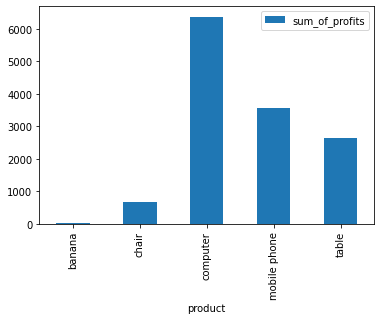

In [157]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
pd.options.plotting.backend = "matplotlib" # this defines the backend for the whole session

df = pd.read_pickle('./data/df_products_random.pickle')
df.groupby(by='product').agg(sum_of_profits=('profit', 'sum')).reset_index().plot(x='product', y='sum_of_profits', kind='bar')

## Styling

Let's prepare a DataFrame example. Don't mind the cryptic code just look at this boring table below and wait until I show some styling 🦄!

In [158]:
df = pd.read_pickle('./data/df_products_random.pickle').head(10).sort_values(by='profit').reset_index(drop=True)
df['product'] = df['product'].replace({'mobile phone':pd.NA, 'banana':pd.NA})
df.iloc[0:3, df.columns.get_loc('profit')] = -df['profit']
df

,profit,product,profile_id,timestamp
0,-1.219595,<NA>,8,2018-01-27 03:59:38+00:00
1,-1.507194,<NA>,2,2018-03-29 19:42:22+00:00
2,-1.533321,<NA>,4,2018-02-06 11:22:46+00:00
3,27.883223,chair,9,2018-02-15 00:24:38+00:00
4,103.239984,table,9,2018-02-02 21:19:35+00:00
5,141.481716,table,1,2018-02-11 20:57:53+00:00
6,262.311584,<NA>,9,2018-01-04 06:31:21+00:00
7,300.981553,computer,9,2018-02-12 05:06:25+00:00
8,312.892860,computer,6,2018-03-05 01:22:00+00:00
9,330.141383,computer,5,2018-03-15 23:15:31+00:00


Let's put some colors on our table. This is what we'll do:
* highlight NULL values (display them in grey)
* highlight the maximum value in column timestamp
* hide the index
* show green bars for column profit
* set the text color to red for negative numbers and set the text color for other values to "navy"

You'll find even more styling methods in the [documentation of pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html).

In [159]:
# custom styling function! Taken from pandas docs on styling and modified a little
def color_negative_values_in_red(val):
    color = 'red' if pd.api.types.is_number(val) and val < 0 else 'navy'
    return f'color:{color}'


# show DataFrame with style 😎
(df.style
 .highlight_null(null_color='grey')
 .highlight_max(axis=0, subset=['timestamp'])
 .hide_index()
 .bar(subset=['profit'], color='lightgreen')
 .applymap(color_negative_values_in_red))

profit,product,profile_id,timestamp
-1.219595,,8,2018-01-27 03:59:38+00:00
-1.507194,,2,2018-03-29 19:42:22+00:00
-1.533321,,4,2018-02-06 11:22:46+00:00
27.883223,chair,9,2018-02-15 00:24:38+00:00
103.239984,table,9,2018-02-02 21:19:35+00:00
141.481716,table,1,2018-02-11 20:57:53+00:00
262.311584,,9,2018-01-04 06:31:21+00:00
300.981553,computer,9,2018-02-12 05:06:25+00:00
312.892860,computer,6,2018-03-05 01:22:00+00:00
330.141383,computer,5,2018-03-15 23:15:31+00:00


## Categoricals

This is a data type in pandas which is particularly memory efficient.

> A categorical variable takes on a limited, and usually fixed, number of possible values.
>
> Categorical data might have an order (e.g. ‘strongly agree’ vs ‘agree’ or ‘first observation’ vs. ‘second observation’)
> but numerical operations (additions, divisions, …) are not possible.

I personally rarely think about using it but it is quite interesting which is why I would point you to the
[documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) and only show how it "looks like" in some examples.

Similarly to the "single" objects pandas Timestamps there are "single" objects for categoricals (which can actually contain multiple values so this is confusing 🙈...).

In [160]:
categories = pd.Categorical(values=['bad', pd.NA, 'good'],
                            categories=['terrible', 'bad', 'okayish', 'good', 'great'],
                            ordered=True) # terrible < bad < okayish... etc
categories

['bad', NaN, 'good']
Categories (5, object): ['terrible' < 'bad' < 'okayish' < 'good' < 'great']

And of course there are also categorical Series

In [161]:
import numpy as np

# list unique categories in their correct orders,
# then generate a list of N values from those categories
unique_categories = ['terrible', 'bad', 'okayish', 'good', 'great']
random_categories = np.random.choice(unique_categories, size=100)

# we can use pd.Categorical to construct our Series
categories = pd.Categorical(values=random_categories,
                            categories=unique_categories,
                            ordered=True)
s = pd.Series(categories)
s

0        great
1         good
2     terrible
3      okayish
4      okayish
        ...   
95       great
96    terrible
97       great
98        good
99     okayish
Length: 100, dtype: category
Categories (5, object): ['terrible' < 'bad' < 'okayish' < 'good' < 'great']

# Bonus: Pandas traps

![Trap for pandas](./imgs/pandas_trap.jpg)

## Remember that by default `df.groupby` discards records where at least one of the group values is null

In [162]:
df = pd.DataFrame({'fruits':['bananas', 'bananas', pd.NA, 'apples', 'apples'],
                   'year':[2019, 2019, 2020, pd.NA, 2021],
                   'profits_in_dollars':[10000, 20000, 45000, 60000, 20000]}).convert_dtypes()
display(df)

# with parameter dropna not provided (defaults to True)
df_grouped = df.groupby(['year', 'fruits']).agg(sum_of_profits=('profits_in_dollars', 'sum'))
display(df_grouped)

# with dropna=True
df_grouped_with_null = df.groupby(['year', 'fruits'], dropna=False).agg(sum_of_profits=('profits_in_dollars', 'sum'))
df_grouped_with_null

,fruits,year,profits_in_dollars
0,bananas,2019,10000
1,bananas,2019,20000
2,<NA>,2020,45000
3,apples,<NA>,60000
4,apples,2021,20000


,,sum_of_profits
year,fruits,
2019,bananas,30000
2021,apples,20000


,,sum_of_profits
year,fruits,
2019.0,bananas,30000
2020.0,NaN,45000
2021.0,apples,20000
NaN,apples,60000


## Null values

### Differences in behaviors between the (still) default pandas null value `NaN` (`numpy.nan`) and the new null "sentinel" from pandas `pd.NA`

Note that this is probably non exhaustive.

> `pd.NA` follows the rules of the [three-valued logic](https://en.wikipedia.org/wiki/Three-valued_logic) (or Kleene logic, similarly to R, SQL and Julia).
>
> source: [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#logical-operations)

`np.nan` is not equal to itself 🐒

In [163]:
import numpy as np
np.nan == np.nan

False

This works as one would probably expect 🤔 

In [164]:
np.nan in (1, 2, np.nan)

True

Now things get interesting. The following example returns a null value (the logic being we don't know ¯\\\_(ツ)\_/¯)

In [165]:
pd.NA == pd.NA

<NA>

None of the following examples will work (I even had to troubleshoot this in a library of mine because of this when upgrading pandas 🙀)

In [166]:
try:
    pd.NA in (1, 2)
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-166-0194849127e8>", line 2, in <module>
    pd.NA in (1, 2)
  File "pandas/_libs/missing.pyx", line 360, in pandas._libs.missing.NAType.__bool__
TypeError: boolean value of NA is ambiguous


In [167]:
try:
    pd.NA in (1, 2, pd.NA)
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-167-e754dd5cdffa>", line 2, in <module>
    pd.NA in (1, 2, pd.NA)
  File "pandas/_libs/missing.pyx", line 360, in pandas._libs.missing.NAType.__bool__
TypeError: boolean value of NA is ambiguous


In the example below 3 is not in the tuple so it does not work (3 could be what the NULL value was supposed to be but we don't know)

In [168]:
try:
    3 in (1, 2, pd.NA)
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-168-52619a031a74>", line 2, in <module>
    3 in (1, 2, pd.NA)
  File "pandas/_libs/missing.pyx", line 360, in pandas._libs.missing.NAType.__bool__
TypeError: boolean value of NA is ambiguous


But this will work though since 2 is in the tuple

In [169]:
2 in (1, 2, pd.NA)

True

## Losing the index when merging

⚠️ If you use merge without using indices as we did before, any index you had will be gone in the resulting DataFrame. Even in the case of a one-to-one relationship.

In [170]:
df = pd.DataFrame({'full_name':['John Rambo', 'John Travolta']}, index=pd.Index([100, 200], name='id'))
df_new_info = pd.DataFrame({'full_name':['Arnold Schwarzenegger', 'John Rambo', 'John Travolta', 'Daniel Zimmermann'],
                            'has_lots_of_muscles':[True, True, True, False],
                            'country':['US', 'US', 'US', 'DE']})
display_side_by_side(df, df_new_info)

df_merged = df.merge(df_new_info, on='full_name', validate='1:1')
print('\nOh noes the index is gone after I merged 😿')
df_merged

full_name 
 
 
 id 
 
 
 
 
 
 100 
 John Rambo 
 
 
 200 
 John Travolta 
 
 
 
 
 
 
 full_name 
 has_lots_of_muscles 
 country 
 
 
 
 
 0 
 Arnold Schwarzenegger 
 True 
 US 
 
 
 1 
 John Rambo 
 True 
 US 
 
 
 2 
 John Travolta 
 True 
 US 
 
 
 3 
 Daniel Zimmermann 
 False 
 DE


Oh noes the index is gone after I merged 😿


,full_name,has_lots_of_muscles,country
0,John Rambo,True,US
1,John Travolta,True,US


How I'd probably handle such a situation would be something like this 🤔. But surely there are other ways... You just have to get creative.

In [171]:
# put "id" in the columns before merging then merge then put the index back as it was
df_merged = (df
             .reset_index()
             .merge(df_new_info, on='full_name', validate='1:1')
             .set_index(df.index.names))
df_merged

,full_name,has_lots_of_muscles,country
id,,,
100,John Rambo,True,US
200,John Travolta,True,US


## Index mismatches 🙀!

In the example below we ask pandas to set values of one column of a DataFrame (so a pd.Series) to the values of another column (in another DataFrame). pandas **aligns** what is on the right and on the left of the assigment by using the **index**. In case of mismatch you get a NULL.

In [172]:
df = pd.DataFrame({'example':['foo', 'bar', 'baz']}, index=[0, 1, 2])
df2 = pd.DataFrame({'example2':['a', 'b', 'c', 'd']}, index=['a', 1, 'c', 'd']) # the index length won't even match
display_side_by_side(df, df2)

df['example2'] = df2['example2']
df.convert_dtypes()

,example
0,foo
1,bar
2,baz
,example2
a,a
1,b
c,c
d,d


,example,example2
0,foo,<NA>
1,bar,b
2,baz,<NA>
